In [4]:
#%% imports
from scipy.io import loadmat
import pandas as pd
import numpy as np
from numpy import matlib
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Helvetica"
plt.rcParams["font.size"] = 40
import seaborn as sns
import pingouin as pg
from gridfunctions import *
from itertools import compress
import scipy.stats as stats
import math
import os
sns.set(style="whitegrid", font_scale = 5)
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [5]:
#load df and df_trials
df = pd.read_csv('data/df_models.csv')
df_trials = pd.read_csv('data/df_models_trials.csv')

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gs/T/ipykernel_96377/570363799.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  g = sns.pointplot(hue = 'obstacles', x = 'actioncondition', y = 'resp_logsteps', data = temp,  palette = 'colorblind', ci = 95, dodge = 0.4, linestyles = 'none', markers = '_', scale = 10, errwidth = 20)
/Users/denislan/opt/anaconda3/envs/dl/lib/python3.11/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.00392156862745098, 0.45098039215686275, 0.6980392156862745)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/denislan/opt/anaconda3/envs/dl/lib/python3.11/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.8705882352941177, 0.5607843137254902, 0.0196078431372549)) for an unfilled marker ('_'

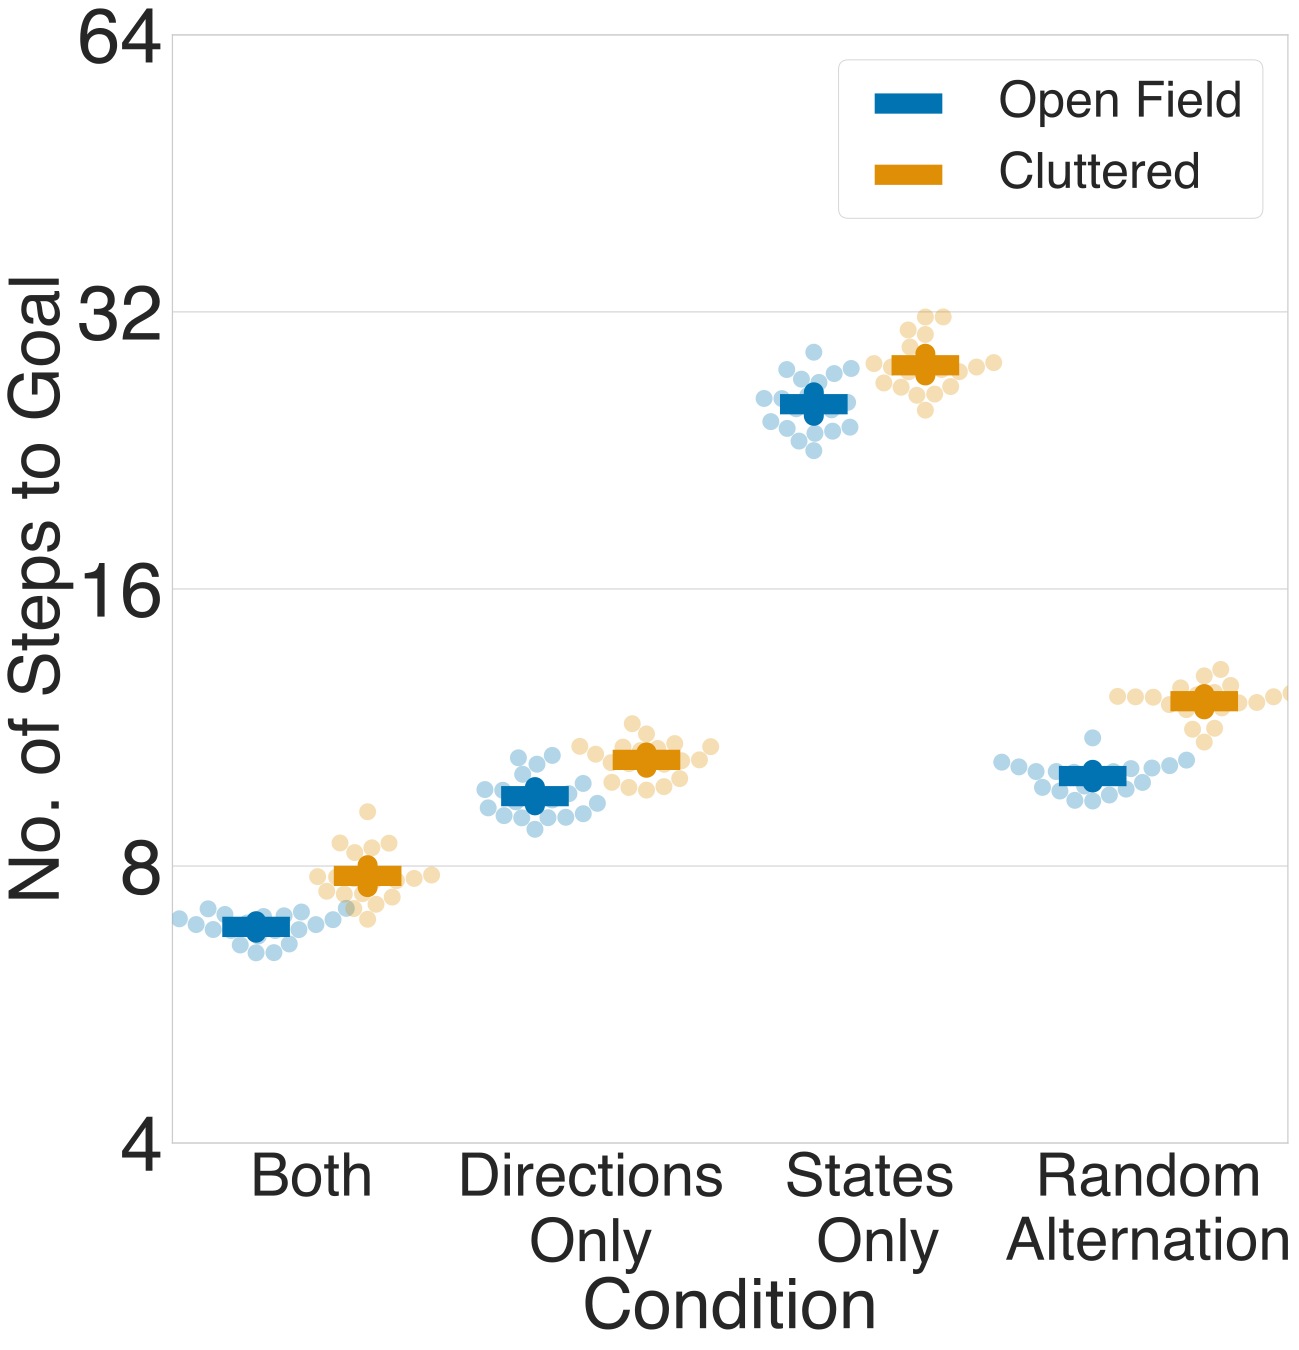

In [4]:
%matplotlib inline
#plot trials by actioncondition
df_trials['resp_logsteps'] = np.log(df_trials['numsteps'])
temp = df_trials.groupby(['model', 'actioncondition', 'obstacles'])['resp_logsteps'].mean().reset_index()


sns.set(style="whitegrid", font_scale = 7)
plt.rcParams['font.family'] = 'Helvetica'
plt.rcParams["font.weight"] = 'normal'
plt.rcParams["font.stretch"] = 'expanded'
fig = plt.figure(figsize = (20,20))
g = sns.pointplot(hue = 'obstacles', x = 'actioncondition', y = 'resp_logsteps', data = temp,  palette = 'colorblind', ci = 95, dodge = 0.4, linestyles = 'none', markers = '_', scale = 10, errwidth = 20)
g.set_ylabel('No. of Steps to Goal', fontsize = 70)
g.set_xlabel('Condition', fontsize = 70)
# g.set_xticklabels(['Both', 'Directions \n Only', 'States \n Only', 'Random'])
#get y tick values
g.set(ylim = (np.log(4), np.log(64)))
yticks = [np.log(4), np.log(8), np.log(16), np.log(32), np.log(64)]
g.set_yticks(yticks)
g.set_yticklabels([np.round(np.exp(x)).astype(int) for x in yticks])
g2 = sns.swarmplot( x = 'actioncondition', y = 'resp_logsteps', hue = 'obstacles', data = temp, alpha = .3,  size = 17, palette = 'colorblind', dodge = 0.7)
# g2.set(xlabel = 'Condition', ylabel = 'No. of Steps to Goal')
g2.set_xticklabels(['Both', 'Directions\nOnly', 'States\n Only', 'Random\nAlternation'], fontsize = 60)
g2.legend(labels = ['_', '_', '_', '_', '_', 'Open Field', '_', '_', '_', '_', '_',  'Cluttered', '_'], fontsize = 50)

In [5]:
#load df_exp1.csv
df_exp1 = pd.read_csv('df_exp1.csv')
df_exp1_part = pd.read_csv('df_exp1_part.csv')

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gs/T/ipykernel_96377/2584530104.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  g[1].set_xticklabels([0, 25, 50, 75, 100])
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gs/T/ipykernel_96377/2584530104.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  g[0].set_yticklabels([np.round(np.exp(x)).astype(int) for x in yticks])
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gs/T/ipykernel_96377/2584530104.py:29: UserWarning: The label '_' of <matplotlib.collections.PathCollection object at 0x138633190> starts with '_'. It is thus excluded from the legend.
  leg = ax.legend(loc = 'upper left', fontsize = 50, title_fontsize = 50, labels =  ['_', 'Open Field', '_', '_', 'Cluttered'])
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gs/T/ipykernel_96377/2584530104.py:29: UserWarning: The label '_' of <matplotlib.collections.PolyCollection object at 0x138644d10> starts with '_'. It is thus exclu

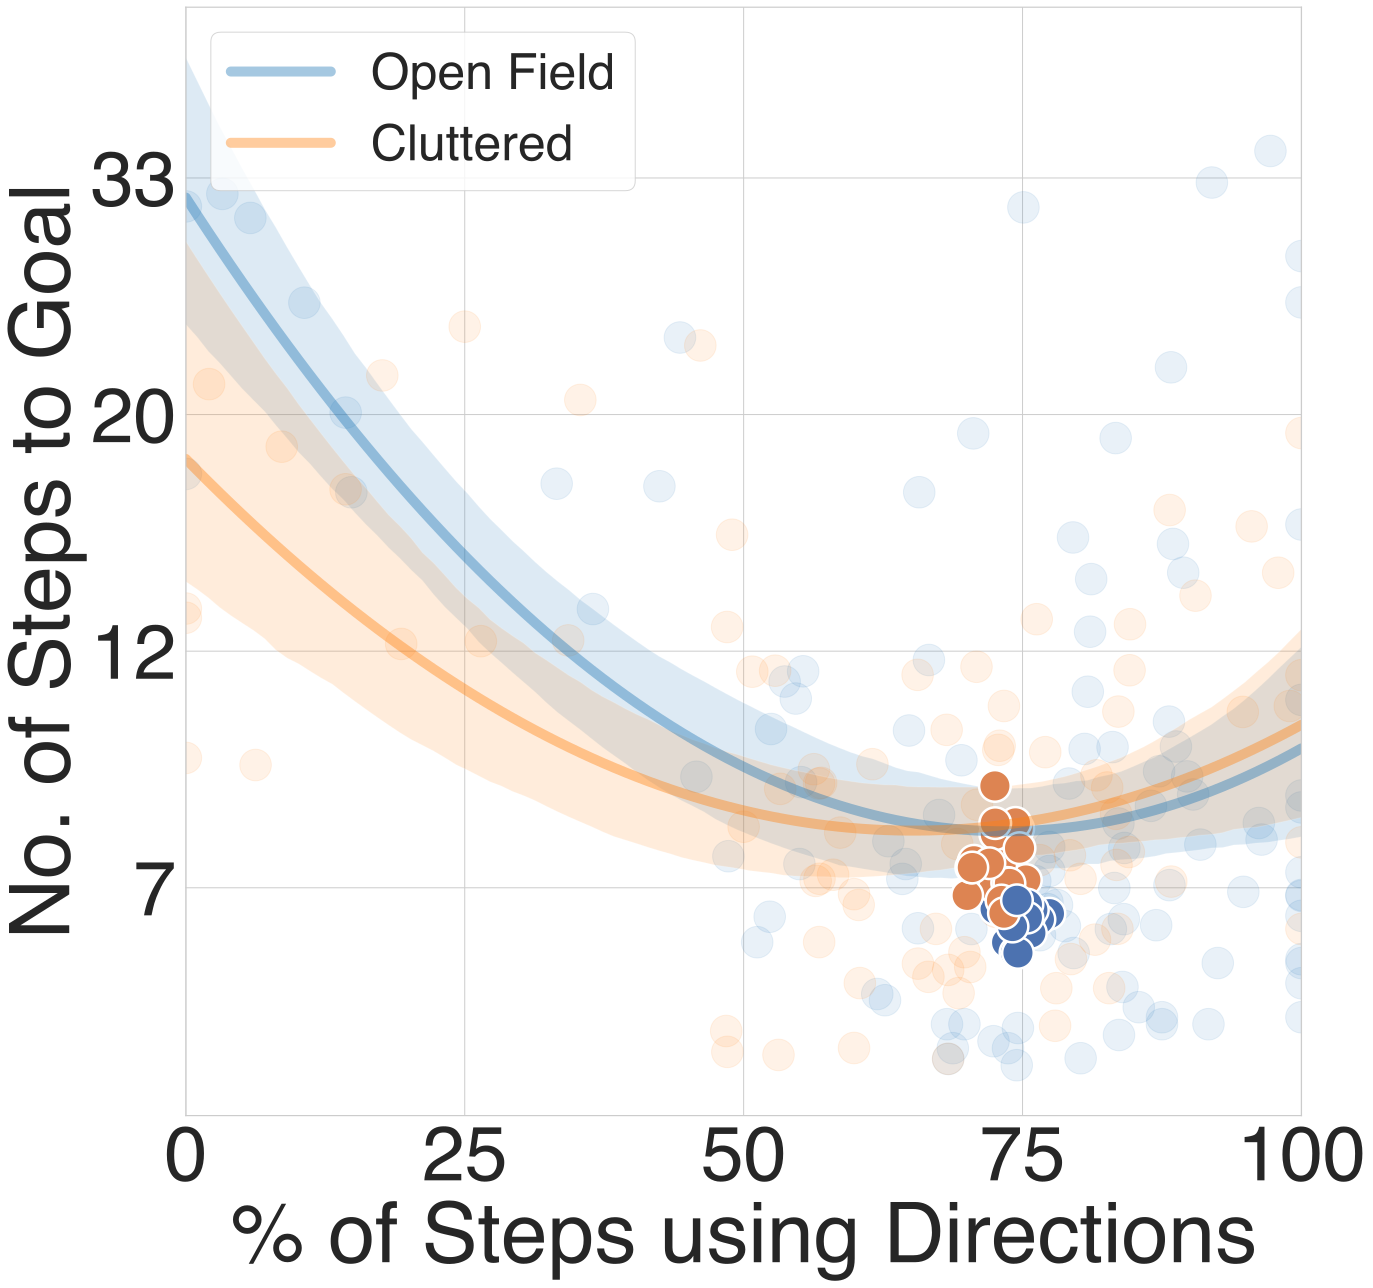

In [6]:
%matplotlib inline
# %% relationship between %vectors and steps
temp = df_exp1.groupby(['partno', 'actioncondition'])[['resp_logsteps', 'resp_steps','resp_directionperc']].mean().reset_index()
temp['obstacles'] = [df_exp1_part['obstacles'][df_exp1_part['partno'] == x].iloc[0] for x in temp['partno']]
fig, ax = plt.subplots(figsize = (20,20))
g = hue_regplot(data = temp[temp['actioncondition'] == 'both'], x = 'resp_directionperc', y = 'resp_logsteps', hue = 'obstacles', order = 2, line_kws = {'linewidth': 10, 'alpha' : 0.4}, scatter_kws = {'s': 1000, 'alpha': 0.1})
g[0].set(xlabel = 'Proportion of Steps using Directions', ylabel = 'No. of Steps to Goal')
#xlabel font weight
g[0].set_xlabel('% of Steps using Directions')
#ylabel font weight
g[0].set_ylabel('No. of Steps to Goal')
#get x tick labels
xticks = g[1].get_xticks()
g[1].set_xticklabels([0, 25, 50, 75, 100])
# g[0].set_xticklabels([int(x*100) for x in xticks])
yticks = g[0].get_yticks()
g[0].set_yticklabels([np.round(np.exp(x)).astype(int) for x in yticks])
g[0].set(xlim = (0,1))


#plot model scatter on same plot

temp = df_trials[df_trials['actioncondition'] == 0].groupby(['model', 'obstacles'])[['directionperc', 'resp_logsteps']].mean().reset_index()
temp['obstacles'] = ['Open Field' if x == 0 else 'Cluttered' for x in temp['obstacles']]

# g = hue_regplot(data = temp, x = 'directionperc', y = 'resp_logsteps', hue = 'obstacles', scatter_kws = {'s': 1000, 'alpha': 0.5, 'marker': 'x'}, order = 2, line_kws = {'linewidth': 10, 'linestyle': '--'})
g = sns.scatterplot(data = temp, x = 'directionperc', y = 'resp_logsteps', hue = 'obstacles', s = 1000, alpha = 1)
#legend
leg = ax.legend(loc = 'upper left', fontsize = 50, title_fontsize = 50, labels =  ['_', 'Open Field', '_', '_', 'Cluttered'])

In [8]:
temp = df_trials[df_trials['actioncondition'] == 0].groupby(['model'])[['directionperc', 'resp_logsteps']].mean().reset_index()

#get median directionperc
median = temp['directionperc'].median()
print(median)

0.7380092492397052


/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gs/T/ipykernel_96377/3119228636.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  g = sns.barplot(x = 'desttype', y = 'proportion', hue = 'prevvisited', data = temp[temp['desttype'] != 'g'], ci = 95, palette = 'colorblind', errwidth = 10, edgecolor = 'black', linewidth = 10, errcolor='black', hue_order = ['False', 'True'], alpha = 1, order = ['g', 'l', 'n'])
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gs/T/ipykernel_96377/3119228636.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  g = sns.barplot(x = 'desttype', y = 'proportion', data = temp[temp['desttype'] == 'g'],   ci = 95, palette = 'colorblind', errwidth = 10, edgecolor = 'black', linewidth = 10, errcolor='black', hue_order = ['False', 'True'], alpha = 1, dodge = True, order = ['g', 'l', 'n'], width = 0.4)
/Users/denislan/opt/anaconda3/envs/dl/lib/python3.11/site-packages

[Text(0, 0.0, '0'),
 Text(0, 0.2, '20'),
 Text(0, 0.4, '40'),
 Text(0, 0.6, '60'),
 Text(0, 0.8, '80'),
 Text(0, 1.0, '100')]

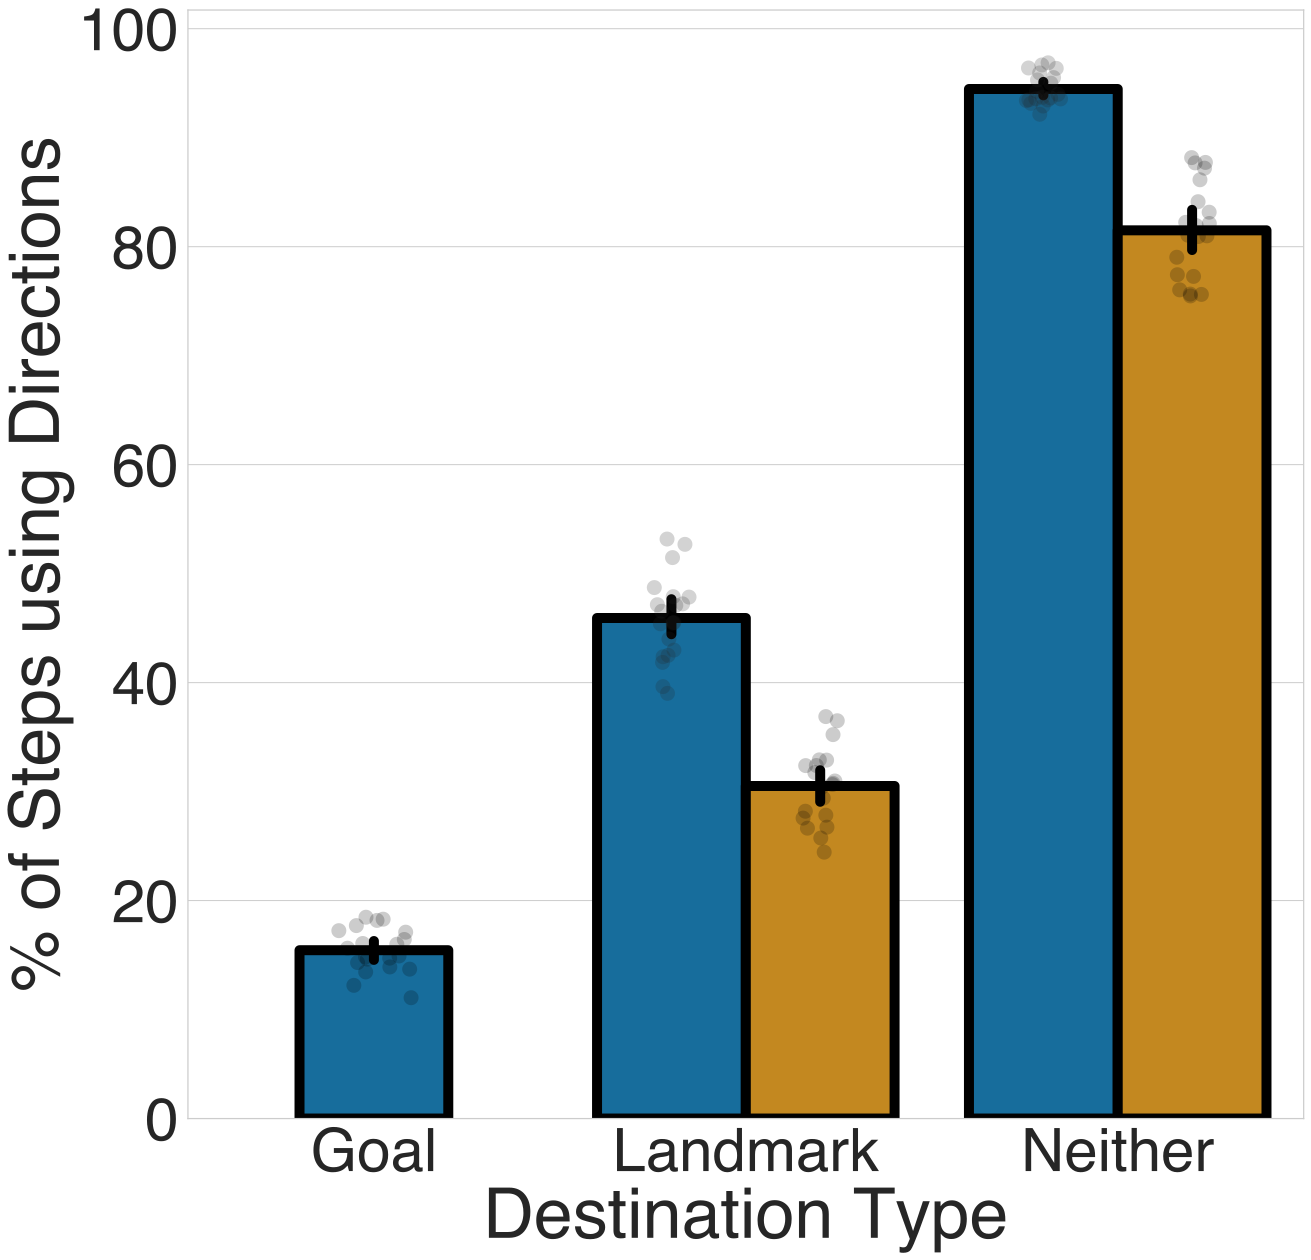

In [7]:
df['resptype'] = df['resptype'].astype('category')
df['prevvisited'] = df['prevvisited'].astype('str')
temp = df[(df['actioncondition'] == 0) & (df['obstacles'] == 1)].reset_index().groupby(['model', 'desttype', 'prevvisited'], as_index = False)['resptype'].value_counts(normalize = True, dropna = True)
# temp = temp[temp['resptype'] == 'd'].reset_index().groupby(['model', 'desttype', 'landmarkencountered'], as_index = False)['proportion'].mean()
temp = temp[temp['resptype'] == 'd']
temp.reset_index(drop = True, inplace = True)
temp = temp[~((temp['desttype'] == 'g') & (temp['prevvisited'] == 'True'))]

fig = plt.figure(figsize = (20,20))

g = sns.barplot(x = 'desttype', y = 'proportion', hue = 'prevvisited', data = temp[temp['desttype'] != 'g'], ci = 95, palette = 'colorblind', errwidth = 10, edgecolor = 'black', linewidth = 10, errcolor='black', hue_order = ['False', 'True'], alpha = 1, order = ['g', 'l', 'n'])
g = sns.barplot(x = 'desttype', y = 'proportion', data = temp[temp['desttype'] == 'g'],   ci = 95, palette = 'colorblind', errwidth = 10, edgecolor = 'black', linewidth = 10, errcolor='black', hue_order = ['False', 'True'], alpha = 1, dodge = True, order = ['g', 'l', 'n'], width = 0.4)

g2 = sns.stripplot(x = 'desttype', y = 'proportion', hue = 'prevvisited', dodge = 0.5, data = temp[temp['desttype'] != 'g'], alpha = .2,  size = 15, color = 'black', hue_order = ['False', 'True'], order = ['g', 'l', 'n'])
g2 = sns.stripplot(x = 'desttype', y = 'proportion',  data = temp[temp['desttype'] == 'g'], alpha = .2,  size = 15, color = 'black',  order = ['g', 'l', 'n'])
g.set_ylabel('% of Steps using Directions', fontsize = 70)
g.set_xlabel('Destination Type', fontsize = 70)
#font size

g.set_xticklabels(['Goal', 'Landmark', 'Neither'], fontsize = 60)
# no legend
g.get_legend().remove()
g.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
g.set_yticklabels(['0', '20', '40', '60', '80', '100'], fontsize = 60)

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gs/T/ipykernel_96377/875098023.py:50: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter([], [], c = palette[i], alpha = 1, label = ['Both', 'Dir. Only', 'States Only', 'Random'][i], s = 1000, marker = 's')


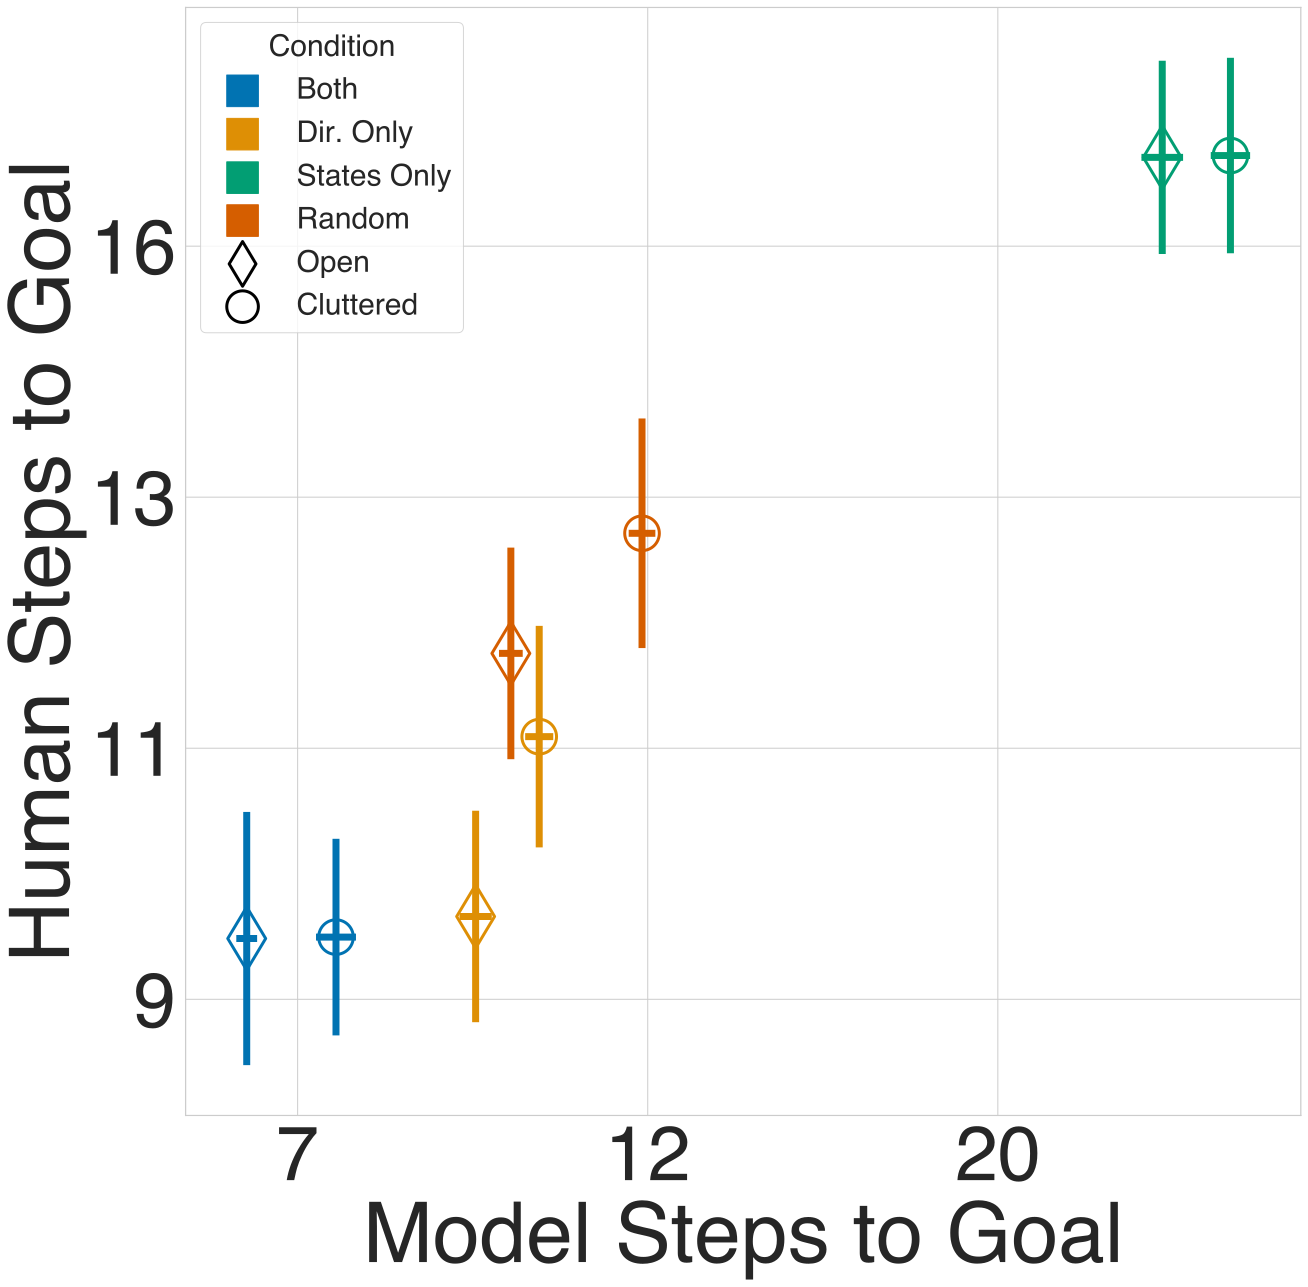

In [8]:
temp = df_trials.groupby(['actioncondition', 'obstacles', 'model'])['resp_logsteps'].mean().reset_index()
temp['agenttype'] = 'model'
temp_human = df_exp1.groupby(['actioncondition', 'obstacles', 'partno'])['resp_logsteps'].mean().reset_index()
temp_human['actioncondition'] = [0 if x == 'both' else 1 if x == 'vonly' else 2 if x == 'tonly' else 3 for x in temp_human['actioncondition']]
temp_human['obstacles'] = [0 if not x else 1 for x in temp_human['obstacles']]
temp_human['agenttype'] = 'human'
# temp['human_logsteps'] = [temp_human[(temp_human['actioncondition'] == x) & (temp_human['obstacles'] == y)]['resp_logsteps'].iloc[0] for x, y in zip(temp['actioncondition'], temp['obstacles'])]
#join temp_human and temp
temp = pd.concat([temp, temp_human])

#scatterplot with model on x-axis and human on y-axis, one point for each condition pair,3with error bars
fig = plt.figure(figsize = (20,20))
palette = sns.color_palette('colorblind', 4)
color_map = {0: palette[0], 1: palette[1], 2: palette[2], 3: palette[3]}

means = temp.groupby(['actioncondition', 'obstacles', 'agenttype'])['resp_logsteps'].mean().reset_index()
means['color'] = means['actioncondition'].map(color_map)
means['marker'] = ['x' if x == 0 else 'o' if x == 1 else 's' for x in means['obstacles']]  # Added default case 's'
stderrors = temp.groupby(['actioncondition', 'obstacles', 'agenttype'])['resp_logsteps'].std().reset_index()
stderrors['color'] = stderrors['actioncondition'].map(color_map)
stderrors['resp_logsteps'] = [x/np.sqrt(np.sum((temp['actioncondition'] == a) & (temp['obstacles'] == b) & (temp['agenttype'] == c)))*1.96 for a, b, c, x in zip(stderrors['actioncondition'], stderrors['obstacles'], stderrors['agenttype'], stderrors['resp_logsteps'])]
# plt.scatter(x = means[means['agenttype'] == 'model']['resp_logsteps'], y = means[means['agenttype'] == 'human']['resp_logsteps'], s = 300, c  = list(means[means['agenttype'] == 'model']['color']), alpha = 1, marker = list(means[means['agenttype'] == 'model']['marker']))
#plot xs first
plt.scatter(x = means[(means['agenttype'] == 'model') & (means['obstacles'] == 0)]['resp_logsteps'], y = means[(means['agenttype'] == 'human') & (means['obstacles'] == 0)]['resp_logsteps'], s = 2000, facecolors = 'none', edgecolors = list(means[(means['agenttype'] == 'model') & (means['obstacles'] == 0)]['color']), alpha = 1, marker = 'd', linewidths=3)
plt.scatter(x = means[(means['agenttype'] == 'model') & (means['obstacles'] == 1)]['resp_logsteps'], y = means[(means['agenttype'] == 'human') & (means['obstacles'] == 1)]['resp_logsteps'], s = 1200, facecolors = 'none', edgecolors = list(means[(means['agenttype'] == 'model') & (means['obstacles'] == 1)]['color']), alpha = 1, marker = 'o', linewidths=3)
# g = sns.scatterplot(data = pivot, x = 'model', y = 'human', s = 300, c = 'actioncondition', cmap = 'viridis', alpha = 1)
plt.errorbar(x = means[means['agenttype'] == 'model']['resp_logsteps'], y = means[means['agenttype'] == 'human']['resp_logsteps'], xerr = stderrors[stderrors['agenttype'] == 'model']['resp_logsteps'], yerr = stderrors[stderrors['agenttype'] == 'human']['resp_logsteps'], fmt = 'none', elinewidth = 7, ecolor = list(stderrors[stderrors['agenttype'] == 'model']['color']), alpha = 1)
#label each condition
means['actioncondition'] = ['Both' if x == 0 else 'Dir. Only' if x == 1 else 'States Only' if x == 2 else 'Random' for x in means['actioncondition']]
means['obstacles'] = ['Open' if x == 0 else 'Cluttered' for x in means['obstacles']]
# for i in range(means[means['agenttype'] == 'model'].shape[0]):
#     plt.text(x = means[means['agenttype'] == 'model']['resp_logsteps'].iloc[i], y = means[means['agenttype'] == 'human']['resp_logsteps'].iloc[i], s = f'{means["actioncondition"][means["agenttype"] == "model"].iloc[i]}, {means["obstacles"][means["agenttype"] == "model"].iloc[i]}', fontsize = 30, rotation = 45)

plt.xlabel('Model Steps to Goal')
plt.ylabel('Human Steps to Goal')

#set xticks
xticks = [np.log(4), np.log(8), np.log(16), np.log(32)]
xticks = plt.xticks()[0]
plt.xticks(xticks, [np.round(np.exp(x)).astype(int) for x in xticks])
yticks = [np.log(8), np.log(12), np.log(18), np.log(27)]
yticks = plt.yticks()[0]
plt.yticks(yticks, [np.round(np.exp(x)).astype(int) for x in yticks])

#legend
#colors
# colors = list(stderrors[stderrors['agenttype'] == 'model']['color'].values)
#legend for colors
for i in range(4):
    plt.scatter([], [], c = palette[i], alpha = 1, label = ['Both', 'Dir. Only', 'States Only', 'Random'][i], s = 1000, marker = 's')
# plt.legend(title = 'Action Condition', fontsize = 30, title_fontsize = 30)

#legend for markers
plt.scatter([], [], alpha = 1, label = 'Open', s = 1000, marker = 'd', edgecolors = 'black', linewidths = 3, facecolors = 'none')
plt.scatter([], [], alpha = 1, label = 'Cluttered', s = 1000, marker = 'o', edgecolors = 'black', linewidths = 3, facecolors = 'none')

#legend for both
plt.legend(title = 'Condition', fontsize = 30, title_fontsize = 30)



In [63]:
temp

,actioncondition,obstacles,model,resp_logsteps,agenttype,partno
0,0,0,1.0,1.954906,model,NaN
1,0,0,2.0,1.881915,model,NaN
2,0,0,3.0,1.920324,model,NaN
3,0,0,4.0,1.972394,model,NaN
4,0,0,5.0,1.945256,model,NaN
...,...,...,...,...,...,...
779,1,1,NaN,2.457886,human,192.0
780,1,1,NaN,2.304321,human,194.0
781,1,1,NaN,2.798218,human,195.0
782,1,1,NaN,2.638062,human,196.0


In [148]:
df_neuron['neuron_classes'] = [x.capitalize() for x in df_neuron['neuron_classes']]
temp = df_neuron.groupby(['modelnum', 'cluster'])['neuron_classes'].value_counts().unstack().fillna(0).reset_index()
# df_neuron['neuron_classes'] =
temp = temp[temp['cluster'] < 3]

temp = temp.melt(id_vars = ['modelnum', 'cluster'], value_vars = ['Spatial', 'Conjunctive', 'Landmark', 'None'])
temp['value'] = temp['value']/10
print(temp)

#add values for pooled across clusters
temp2 = df_neuron.groupby(['modelnum'])['neuron_classes'].value_counts().unstack().fillna(0).reset_index()
temp2 = temp2.melt(id_vars = ['modelnum'], value_vars = ['Spatial', 'Conjunctive', 'Landmark', 'None'])
temp2['cluster'] = -1
temp2['value'] = temp2['value']/100
temp = pd.concat([temp, temp2])
print(temp)
temp['value'] = temp['value']*100


     modelnum  cluster neuron_classes  value
0           1        0        Spatial    0.6
1           1        1        Spatial    0.4
2           1        2        Spatial    0.5
3           2        0        Spatial    0.9
4           2        1        Spatial    0.5
..        ...      ...            ...    ...
235        19        1           None    0.0
236        19        2           None    0.0
237        20        0           None    0.1
238        20        1           None    0.0
239        20        2           None    0.0

[240 rows x 4 columns]
    modelnum  cluster neuron_classes  value
0          1        0        Spatial   0.60
1          1        1        Spatial   0.40
2          1        2        Spatial   0.50
3          2        0        Spatial   0.90
4          2        1        Spatial   0.50
..       ...      ...            ...    ...
75        16       -1           None   0.07
76        17       -1           None   0.04
77        18       -1           None   0

In [36]:
mean_temp1

,cluster,value
0,-1,0.229
1,0,0.470
2,1,0.130
3,2,0.170


/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gs/T/ipykernel_47576/3062722747.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp2['value'] = [temp2['value'].iloc[i] + mean_temp1['value'][mean_temp1['cluster'] == temp2['cluster'].iloc[i]].iloc[0] for i in range(temp2.shape[0])]
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gs/T/ipykernel_47576/3062722747.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp3['value'] = [temp3['value'].iloc[i] + mean_temp2['value'][mean_temp2['cluster'] == temp3['clust

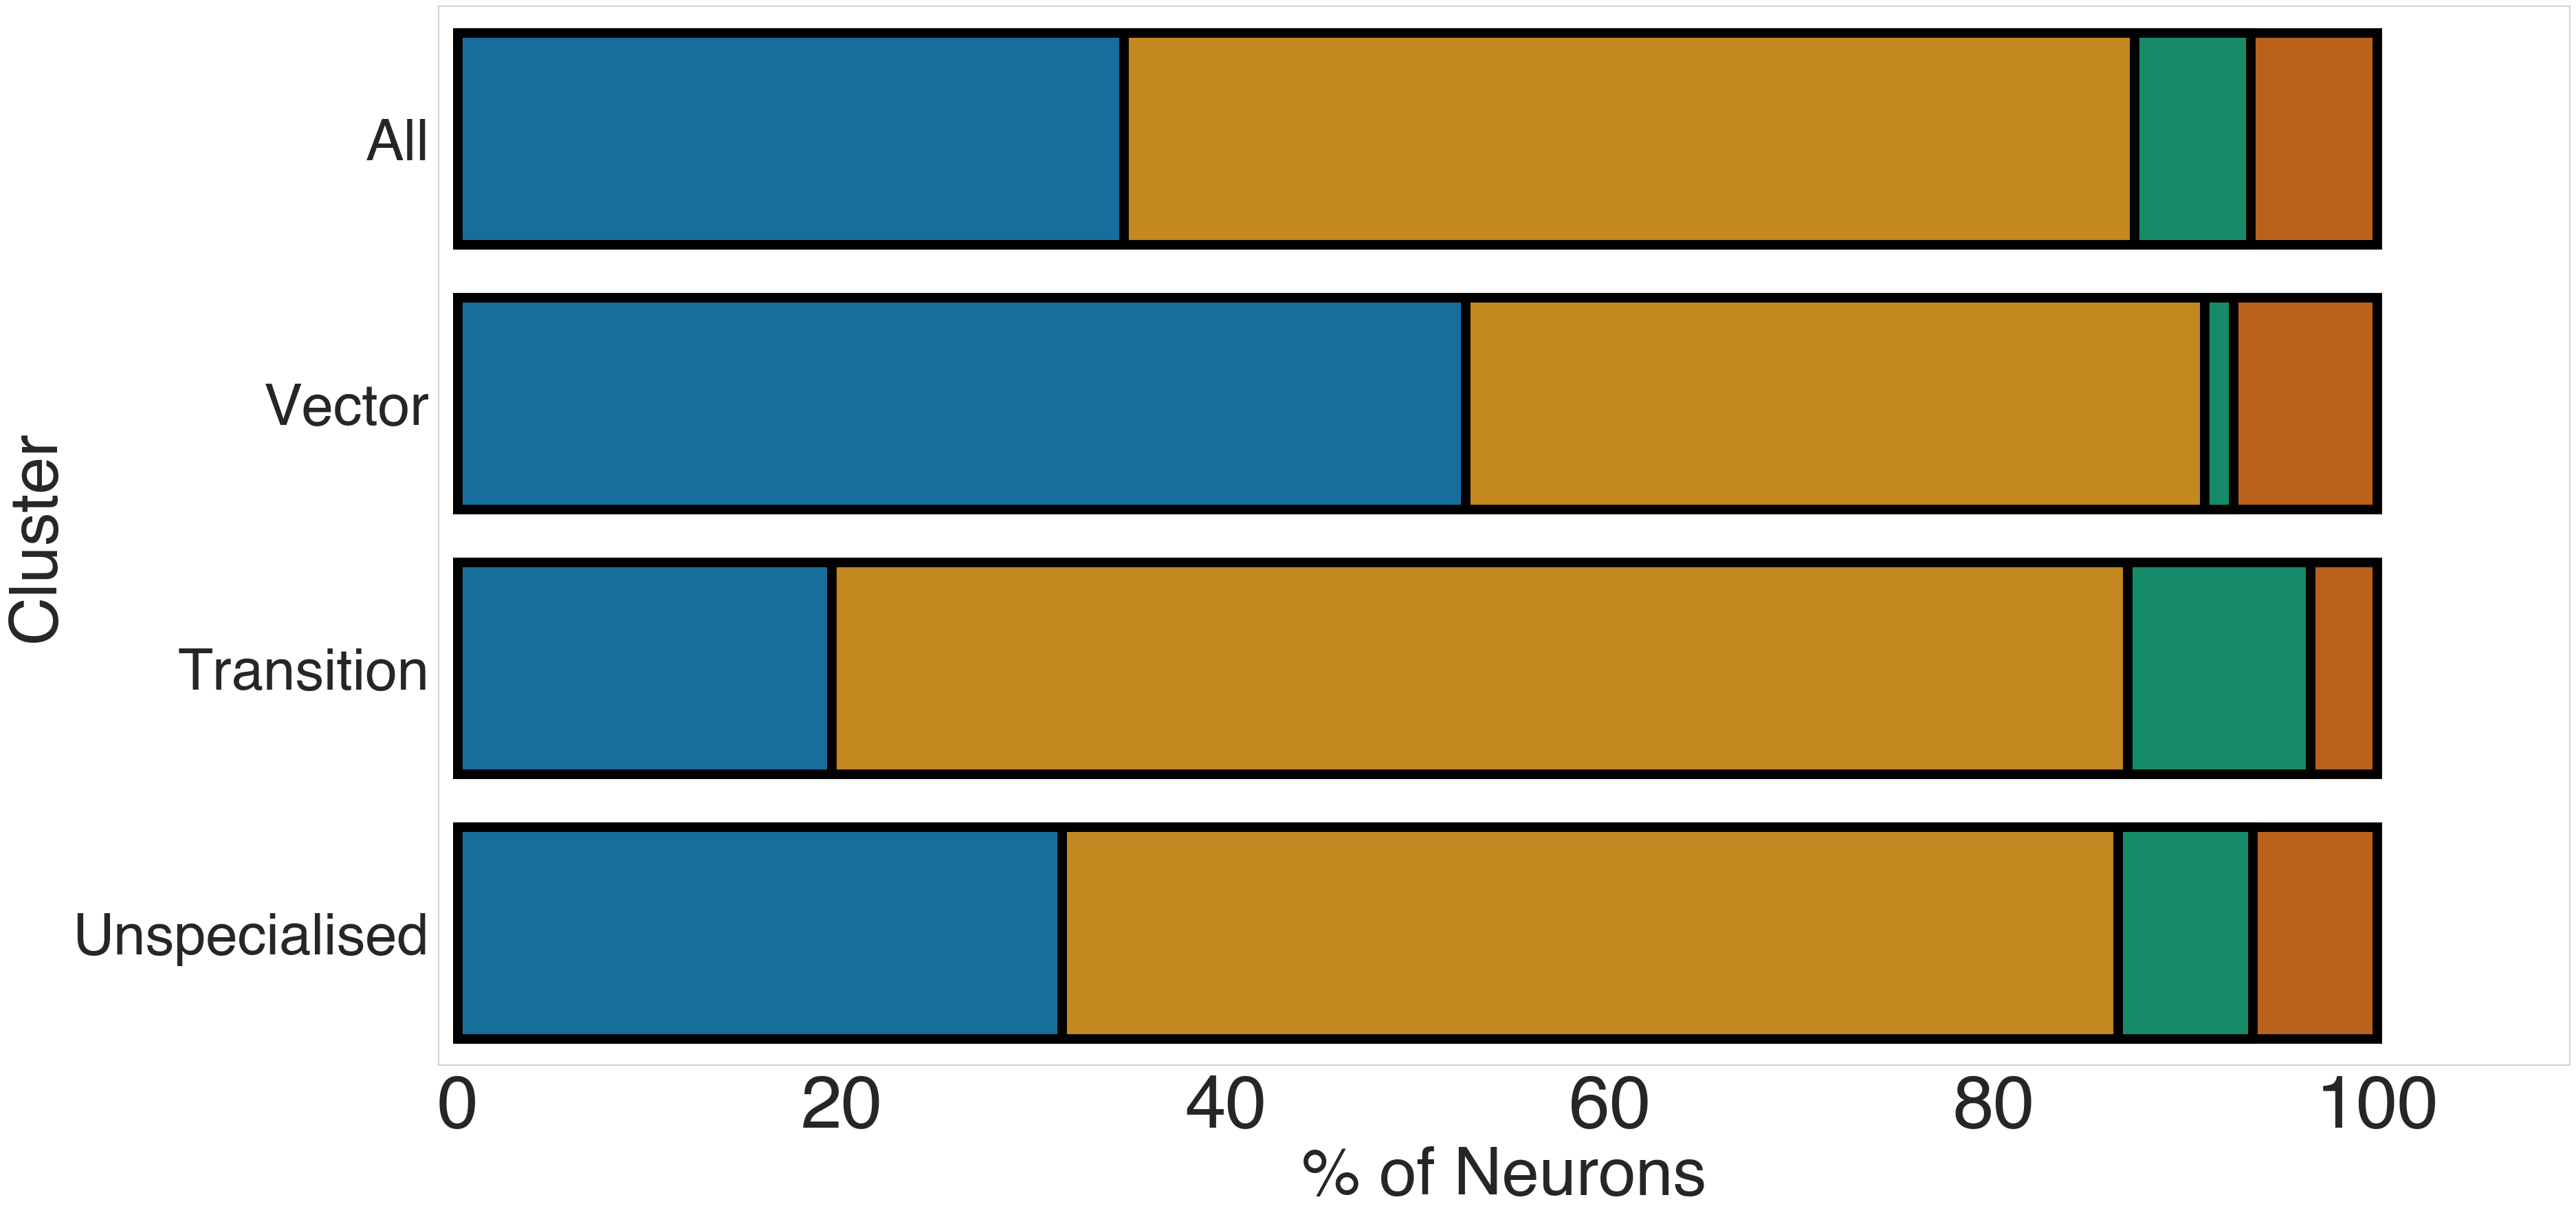

In [150]:
#stacked bar chart
fig = plt.figure(figsize = (40,20))
# temp_pivot = temp.pivot_table(index = ['modelnum', 'cluster'], columns = 'neuron_classes', values = 'value').reset_index()
# temp_pivot_mean = temp_pivot.groupby('cluster').mean().reset_index()
# temp_pivot_mean.plot.bar(stacked = True, x = 'cluster', y = ['spatial', 'conjunctive', 'landmark', 'none'], color = palette, width = 0.7)

# #add error bars
# temp_pivot_std = temp_pivot.groupby('cluster').std().reset_index()
# for i in range(4):
#     plt.errorbar(temp_pivot_mean['cluster'], temp_pivot_mean.iloc[:,i+1], yerr = temp_pivot_std.iloc[:,i+1], fmt = 'none', ecolor = 'black', capsize = 10, elinewidth = 10)
palette = sns.color_palette('colorblind')

temp1 = temp[temp['neuron_classes'] == 'Spatial']


temp2 = temp[temp['neuron_classes'] == 'Conjunctive']
mean_temp1 = temp1.groupby('cluster')['value'].mean().reset_index()
temp2['value'] = [temp2['value'].iloc[i] + mean_temp1['value'][mean_temp1['cluster'] == temp2['cluster'].iloc[i]].iloc[0] for i in range(temp2.shape[0])]

temp3 = temp[temp['neuron_classes'] == 'Landmark']
mean_temp2 = temp2.groupby('cluster')['value'].mean().reset_index()
temp3['value'] = [temp3['value'].iloc[i] + mean_temp2['value'][mean_temp2['cluster'] == temp3['cluster'].iloc[i]].iloc[0] for i in range(temp3.shape[0])]

temp4 = temp[temp['neuron_classes'] == 'None']
mean_temp3 = temp3.groupby('cluster')['value'].mean().reset_index()
temp4['value'] = [temp4['value'].iloc[i] + mean_temp3['value'][mean_temp3['cluster'] == temp4['cluster'].iloc[i]].iloc[0] for i in range(temp4.shape[0])]


g4 = sns.barplot(y = 'cluster', x = 'value', data = temp4, color=palette[3], ci = 68, errwidth = 0, edgecolor = 'black', linewidth = 10, errcolor='black', alpha = 1, orient = 'h')
g3 = sns.barplot(y = 'cluster', x = 'value', data = temp3, color=palette[2], ci = 68, errwidth = 0, edgecolor = 'black', linewidth = 10, errcolor='black', alpha = 1, orient = 'h')

g2 = sns.barplot(y = 'cluster', x = 'value', data = temp2, color=palette[1], ci = 68, errwidth = 0, edgecolor = 'black', linewidth = 10, errcolor='black', alpha = 1, orient = 'h')
g1 = sns.barplot(y = 'cluster', x = 'value', data = temp1, color=palette[0], ci = 68, errwidth = 0, edgecolor = 'black', linewidth = 10, errcolor='black', alpha = 1, orient = 'h')

g1.set_ylabel('Cluster', fontsize = 70)
#multiply yticks by 100
# xticks = g1.get_xticks()
# g1.set_xticklabels([0, 20, 40, 60, 80, 100], fontsize = 60)
g1.set_xlabel('% of Neurons', fontsize = 70)
g1.set_yticklabels(['All', 'Vector', 'Transition', 'Unspecialised'], fontsize = 60)

#set xlim
g1.set_xlim(-0.005 * 200, 110)

#no grid lines
g1.grid(False)

# #add error bars, with y offset for each cluster
# temp1_std = temp1.groupby('cluster')['value'].std().reset_index()
# temp2_std = temp2.groupby('cluster')['value'].std().reset_index()
# temp3_std = temp3.groupby('cluster')['value'].std().reset_index()
# temp4_std = temp4.groupby('cluster')['value'].std().reset_index()

# # Calculate standard error for each group
# temp1_se = temp1.groupby('cluster')['value'].apply(lambda x: np.std(x) / np.sqrt(len(x))).reset_index(name='value')
# temp2_se = temp2.groupby('cluster')['value'].apply(lambda x: np.std(x) / np.sqrt(len(x))).reset_index(name='value')
# temp3_se = temp3.groupby('cluster')['value'].apply(lambda x: np.std(x) / np.sqrt(len(x))).reset_index(name='value')
# temp4_se = temp4.groupby('cluster')['value'].apply(lambda x: np.std(x) / np.sqrt(len(x))).reset_index(name='value')

# temp1_mean = temp1.groupby('cluster')['value'].mean().reset_index()
# temp2_mean = temp2.groupby('cluster')['value'].mean().reset_index()
# temp3_mean = temp3.groupby('cluster')['value'].mean().reset_index()
# temp4_mean = temp4.groupby('cluster')['value'].mean().reset_index()

# y_vals = np.array([-1, 0, 1, 2])
# for i in range(4):
#     plt.errorbar(temp1_mean['value'][i], i - 0.09, xerr = temp1_se['value'][i], fmt = 'none', ecolor = 'black', capsize = 0, elinewidth = 10)
#     plt.errorbar(temp2_mean['value'][i], i - 0.03, xerr = temp2_se['value'][i], fmt = 'none', ecolor = 'black', capsize = 0, elinewidth = 10)
#     plt.errorbar(temp3_mean['value'][i], i + 0.03, xerr = temp3_se['value'][i], fmt = 'none', ecolor = 'black', capsize = 0, elinewidth = 10)
#     plt.errorbar(temp4_mean['value'][i], i + 0.09, xerr = temp4_se['value'][i], fmt = 'none', ecolor = 'black', capsize = 0, elinewidth = 10)

In [154]:
#chi square test 
temp = df_neuron.groupby(['cluster'])['neuron_classes'].value_counts().unstack().fillna(0).reset_index()
temp = temp[temp['cluster'] < 3]
print(temp)

from scipy.stats import chi2_contingency
chi2, p, dof, ex = chi2_contingency(temp[['Spatial', 'Conjunctive', 'Landmark', 'None']])
print(p)
print(chi2)
print(dof)
#adjusted residuals
from statsmodels.stats.contingency_tables import Table
table = Table(temp[['Spatial', 'Conjunctive', 'Landmark', 'None']])
res = table.resid_pearson
print(res)

#p-value for each cell
pvals = res.applymap(lambda x: stats.norm.sf(abs(x))*2)
print(pvals)


neuron_classes  cluster  Conjunctive  Landmark  None  Spatial
0                     0           77         3    15      105
1                     1          135        19     7       39
2                     2          110        14    13       63
1.5646505927869545e-11
62.2561076604555
6
neuron_classes   Spatial  Conjunctive  Landmark     None
0               4.333891    -2.927877 -2.598076  0.97590
1              -3.611576     2.670481  2.020726 -1.36626
2              -0.722315     0.257396  0.577350  0.39036
neuron_classes   Spatial  Conjunctive  Landmark      None
0               0.000015     0.003413  0.009375  0.329114
1               0.000304     0.007574  0.043308  0.171857
2               0.470101     0.796873  0.563703  0.696270


In [18]:
temp
#anova

from statsmodels.stats.anova import AnovaRM
from statsmodels.stats.anova import anova_lm

model = AnovaRM(temp, 'value', 'modelnum', within = ['cluster', 'neuron_classes'])
results = model.fit()
print(results)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                        Anova
                       F Value  Num DF  Den DF Pr > F
-----------------------------------------------------
cluster                     nan 2.0000 18.0000    nan
neuron_classes         108.9676 3.0000 27.0000 0.0000
cluster:neuron_classes   8.7731 6.0000 54.0000 0.0000



/Users/denislan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/anova.py:602: RuntimeWarning: invalid value encountered in scalar divide
  F = msm / mse
/Users/denislan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/iolib/summary2.py:579: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dat = dat.applymap(lambda x: _formatter(x, float_format))


In [7]:
df_ablated = pd.read_csv('data/df_ablated_all.csv')

In [8]:
num_steps = []
modelnums = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
for modelnum in modelnums:
    print(modelnum)
    temp = [df_ablated['stepno'][(df_ablated['trialno'] == i) & (df_ablated['model'] == modelnum)].max() for i in df_ablated['trialno'].unique()]
    num_steps.extend(temp)
df_trials = pd.DataFrame({'numsteps': num_steps})
df_trials['trialno'] = np.tile(np.arange(0, 4000), 20)
df_trials['actioncondition'] = [df_ablated['actioncondition'][df_ablated['trialno'] == i].iloc[0] for i in df_trials['trialno']]
df_trials['lesioned'] = [df_ablated['clusterdeactivated'][df_ablated['trialno'] == i].iloc[0] for i in df_trials['trialno']]
df_trials['lognumsteps'] = np.log(df_trials['numsteps'] + 1)
df_trials['model'] = np.repeat(np.arange(1, 21), 4000)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


     lesioned  actioncondition  model  numsteps
0           0                1      1    83.742
1           0                1      2    89.372
2           0                1      3    54.076
3           0                1      4    71.054
4           0                1      5    52.246
..        ...              ...    ...       ...
155         3                2     16    47.326
156         3                2     17    47.128
157         3                2     18    42.464
158         3                2     19    47.568
159         3                2     20    44.862

[160 rows x 4 columns]


/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gs/T/ipykernel_27144/752300449.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  g = sns.pointplot(x='actioncondition', y='logsteps', hue = 'lesioned', data=temp[temp['lesioned'] < 3], ci = 68, scale = 10, errwidth = 20, linestyles = 'None' ,markers = '_', palette = pallete, dodge = 0.53)
/Users/denislan/opt/anaconda3/envs/dl/lib/python3.11/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.00392156862745098, 0.45098039215686275, 0.6980392156862745)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/denislan/opt/anaconda3/envs/dl/lib/python3.11/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.8705882352941177, 0.5607843137254902, 0.0196078431372549)) for an unfilled marker

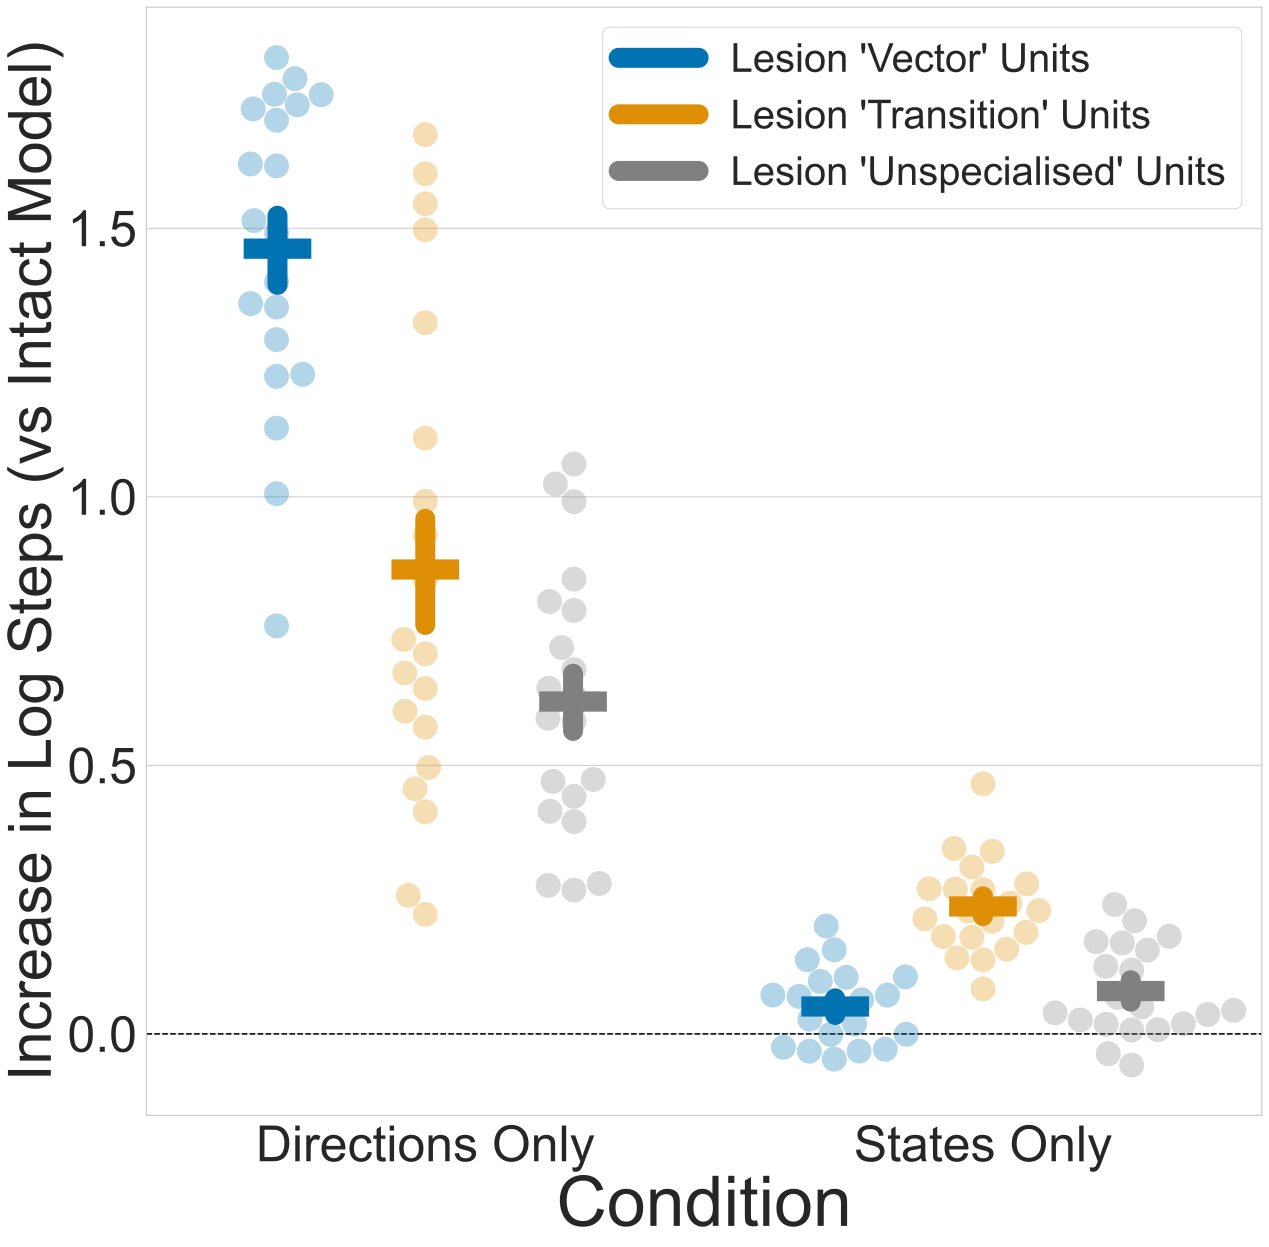

In [9]:
fig = plt.figure(figsize = (20, 20))
sns.set(style="whitegrid", font_scale = 7)
temp = df_trials[(df_trials['actioncondition']== 1) | (df_trials['actioncondition']== 2)]
temp = temp.groupby(['lesioned', 'actioncondition', 'model'])['numsteps'].mean().reset_index()
print(temp)
# temp['numsteps'] = [temp['numsteps'].iloc[i] - temp[(temp['actioncondition'] == temp['actioncondition'].iloc[i]) & (temp['lesioned'] == 3) & (temp['model'] == temp['model'].iloc[i])]['numsteps'].iloc[0] for i in range(len(temp))]
temp['logsteps'] = np.log(temp['numsteps'])
temp['logsteps'] = [temp['logsteps'].iloc[i] - temp[(temp['actioncondition'] == temp['actioncondition'].iloc[i]) & (temp['lesioned'] == 3) & (temp['model'] == temp['model'].iloc[i])]['logsteps'].iloc[0] for i in range(len(temp))]
# temp['numsteps'] = np.log(temp['numsteps'])
pallete = sns.color_palette('colorblind')
pallete = pallete[:2]
pallete.append((0.5, 0.5, 0.5))
g = sns.pointplot(x='actioncondition', y='logsteps', hue = 'lesioned', data=temp[temp['lesioned'] < 3], ci = 68, scale = 10, errwidth = 20, linestyles = 'None' ,markers = '_', palette = pallete, dodge = 0.53)

g2 = sns.swarmplot(x='actioncondition', y='logsteps', hue = 'lesioned', data=temp[temp['lesioned'] < 3], alpha = .3, size = 25, palette = pallete, dodge = 0.2)
#horz dotted line at 0

# g.set(xlabel = 'Condition', ylabel = 'Excess No. of Steps (vs Intact Model)'
g.set_xlabel('Condition', fontsize = 70)
g.set_ylabel('Increase in Log Steps (vs Intact Model)', fontsize = 60)
g.set_xticklabels(['Directions Only', 'States Only'], fontsize = 50)
yticks = np.around(g.get_yticks(), decimals = 3)
# yticks = [int(y) for y in yticks]
g.set_yticklabels(yticks, fontsize = 50)
g.legend(labels = ["_", "_", "Lesion 'Vector' Units","_", "_",  "Lesion 'Transition' Units", "_", "_","_","Lesion 'Unspecialised' Units"], ncol = 1, loc='upper right', fontsize = 40)
plt.axhline(y=0, color='black', linestyle='--')

In [11]:
df_lineardecoding = pd.read_csv('data/lineardecoding.csv')

In [12]:
oldx = df_lineardecoding[df_lineardecoding['value'] == 'oldx'].reset_index(drop=True)
#add 'x' to column names
oldx.columns = [str(col) + '_x' for col in oldx.columns]
oldy = df_lineardecoding[df_lineardecoding['value'] == 'oldy'].reset_index(drop=True)
#add 'y' to column names
oldy.columns = [str(col) + '_y' for col in oldy.columns]

goalx = df_lineardecoding[df_lineardecoding['value'] == 'goalx'].reset_index(drop=True)
#add 'x' to column names
goalx.columns = [str(col) + '_goalx' for col in goalx.columns]
goaly = df_lineardecoding[df_lineardecoding['value'] == 'goaly'].reset_index(drop=True)
#add 'y' to column names
goaly.columns = [str(col) + '_goaly' for col in goaly.columns]


df_combined = pd.concat([oldx, oldy, goalx, goaly], axis = 1)
df_combined['euclidean_error_old'] = np.sqrt((df_combined['error_x']**2) + (df_combined['error_y']**2))
df_combined['euclidean_error_goal'] = np.sqrt((df_combined['error_goalx']**2) + (df_combined['error_goaly']**2))
print(df_combined)

         Unnamed: 0_x  actual_x  decoded_x   error_x value_x  cluster_x  \
0                   0         6   4.277192  1.722808    oldx          0   
1                   1         2   3.006576  1.006576    oldx          0   
2                   2         1   3.517516  2.517516    oldx          0   
3                   3         5   3.845227  1.154773    oldx          0   
4                   4         3   2.879369  0.120631    oldx          0   
...               ...       ...        ...       ...     ...        ...   
1091983         56365         4   3.966985  0.033015    oldx          2   
1091984         56366         3   2.602796  0.397204    oldx          2   
1091985         56367         6   4.497168  1.502831    oldx          2   
1091986         56368         6   3.836214  2.163786    oldx          2   
1091987         56369         2   3.002011  1.002011    oldx          2   

         model_x  Unnamed: 0_y  actual_y  decoded_y  ...  model_goalx  \
0              1         5

     model_x  cluster_x                 value     error
0          1          0   euclidean_error_old  2.519734
1          1          1   euclidean_error_old  2.571574
2          1          2   euclidean_error_old  2.480825
3          2          0   euclidean_error_old  2.484745
4          2          1   euclidean_error_old  2.525124
..       ...        ...                   ...       ...
115       19          1  euclidean_error_goal  1.780328
116       19          2  euclidean_error_goal  1.987947
117       20          0  euclidean_error_goal  1.815124
118       20          1  euclidean_error_goal  1.919445
119       20          2  euclidean_error_goal  2.024207

[120 rows x 4 columns]


/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gs/T/ipykernel_27144/117162433.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  g = sns.pointplot(data = temp, x = 'value', y = 'error', hue = 'cluster_x',  palette = 'colorblind', ci = 95, dodge = 0.54, linestyles = 'none', markers = '_', scale = 10, errwidth = 20)
/Users/denislan/opt/anaconda3/envs/dl/lib/python3.11/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.00392156862745098, 0.45098039215686275, 0.6980392156862745)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/denislan/opt/anaconda3/envs/dl/lib/python3.11/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.8705882352941177, 0.5607843137254902, 0.0196078431372549)) for an unfilled marker ('_').  Matplotlib is 

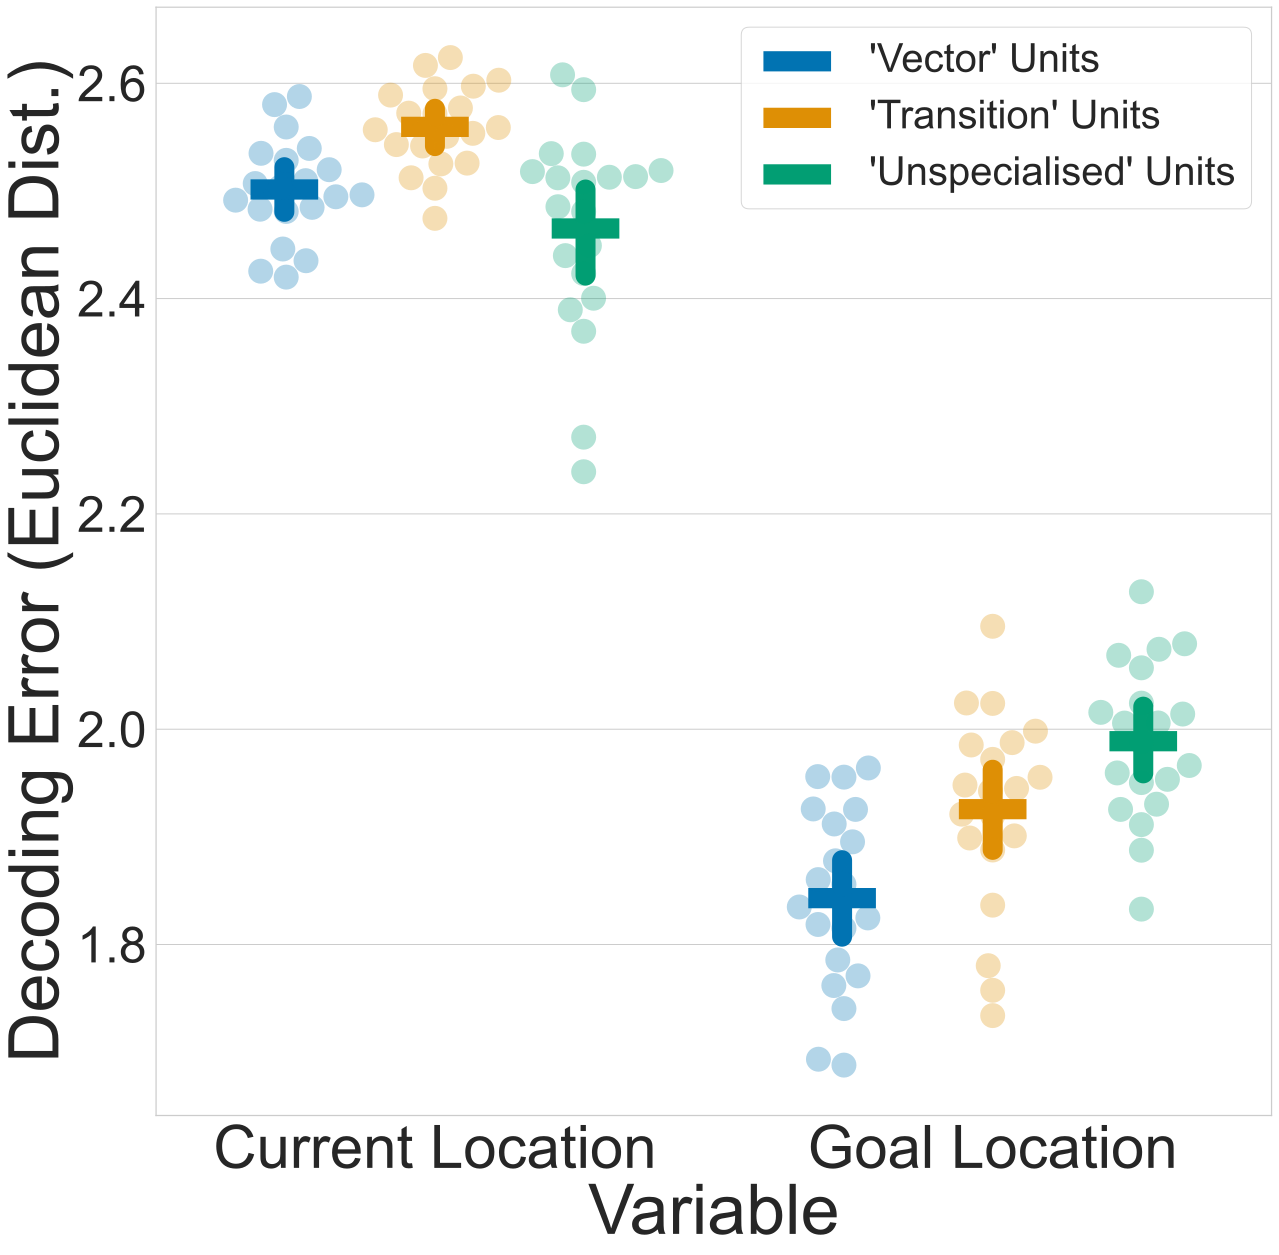

In [14]:
#plot error
temp = df_combined.groupby(['model_x', 'cluster_x'])[['euclidean_error_old', 'euclidean_error_goal']].mean().reset_index()
#pivot table
temp = pd.melt(temp, id_vars = ['model_x', 'cluster_x'], value_vars = ['euclidean_error_old', 'euclidean_error_goal'], var_name = 'value', value_name = 'error')
print(temp)
sns.set(style="whitegrid", font_scale = 7)
fig = plt.figure(figsize = (20,20))
g = sns.pointplot(data = temp, x = 'value', y = 'error', hue = 'cluster_x',  palette = 'colorblind', ci = 95, dodge = 0.54, linestyles = 'none', markers = '_', scale = 10, errwidth = 20)
g2 = sns.swarmplot(data = temp, x = 'value', y = 'error', hue = 'cluster_x',  alpha = .3,  size = 25, palette = 'colorblind', dodge = 0.4)
g2.set_xlabel('Variable', fontsize = 70)
g2.set_xticklabels(['Current Location', 'Goal Location'], fontsize = 60)
g2.set_ylabel('Decoding Error (Euclidean Dist.)', fontsize = 70)
#set yticklabel fontsize
yticks = g2.get_yticks()
yticks = np.around(yticks, decimals = 1)
g2.set_yticklabels(yticks, size = 50)
#set legend
g2.legend(loc = 'upper right', fontsize = 40, labels=['_', '_', '_',"'Vector' Units",'_', '_', '_',   "'Transition' Units", '_', '_', '_', "'Unspecialised' Units"])

In [16]:
#anova
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from itertools import combinations  

#perform two-way ANOVA
temp = df_combined.groupby(['model_x', 'cluster_x'])[['euclidean_error_old', 'euclidean_error_goal']].mean().reset_index()
temp = pd.melt(temp, id_vars = ['model_x', 'cluster_x'], value_vars = ['euclidean_error_old', 'euclidean_error_goal'], var_name = 'value', value_name = 'error')
temp = temp[temp['value'] == 'euclidean_error_goal'].groupby(['model_x', 'cluster_x'])['error'].mean().reset_index()
model = ols('error ~ C(cluster_x)', data = temp).fit()
anova_table = anova_lm(model, typ = 2)
print(anova_table)

#post-hoc t-tests with bonferroni correction
from statsmodels.stats.multitest import multipletests
from scipy.stats import ttest_ind

comparisons = list(combinations(temp['cluster_x'].unique(), 2))
p_values = []
t_stats = []
for g1, g2 in comparisons:
    temp1 = temp[temp['cluster_x'] == g1]['error']
    temp2 = temp[temp['cluster_x'] == g2]['error']
    p_values.append(ttest_ind(temp1, temp2)[1])
    t_stats.append(ttest_ind(temp1, temp2)[0])
    #degrees of freedom
    df = len(temp1) + len(temp2) - 2
    print(df)

reject, p_values_corrected, alphacSidak, alphacBonf = multipletests(p_values, alpha = 0.05, method = 'bonferroni')

for (g1, g2), p, p_corr, t in zip(comparisons, p_values, p_values_corrected, t_stats):
    print(f'{g1} vs {g2}: p-value = {p}, corrected p-value = {p_corr}')
    print(f't-statistic = {t}')
    print()



Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                sum_sq    df         F    PR(>F)
C(cluster_x)  0.213810   2.0  15.24214  0.000005
Residual      0.399785  57.0       NaN       NaN
38
38
38
0 vs 1: p-value = 0.0054538710467755104, corrected p-value = 0.016361613140326532
t-statistic = -2.947266684704747

0 vs 2: p-value = 9.785325776096034e-07, corrected p-value = 2.93559773282881e-06
t-statistic = -5.82854201481129

1 vs 2: p-value = 0.02139263090893825, corrected p-value = 0.06417789272681475
t-statistic = -2.400168896586228

38
38
38
0 vs 1: p-value = 0.0054538710467755104, corrected p-value = 0.016361613140326532
t-statistic = -2.947266684704747

0 vs 2: p-value = 9.785325776096034e-07, corrected p-value = 2.93559773282881e-06
t-statistic = -5.82854201481129

1 vs 2: p-

In [15]:
df_logdecoding = pd.read_csv('data/logdecoding.csv')

     model  cluster            value     error
0        1        0      adj_to_goal  0.384739
1        1        0  adj_to_landmark  0.310544
2        1        1      adj_to_goal  0.304696
3        1        1  adj_to_landmark  0.194876
4        1        2      adj_to_goal  0.429562
..     ...      ...              ...       ...
115     20        0  adj_to_landmark  0.394757
116     20        1      adj_to_goal  0.359960
117     20        1  adj_to_landmark  0.230087
118     20        2      adj_to_goal  0.392821
119     20        2  adj_to_landmark  0.280649

[120 rows x 4 columns]


/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gs/T/ipykernel_27144/4011545994.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  g = sns.pointplot(data = temp, x = 'value', y = 'error', hue = 'cluster',  palette = 'colorblind', ci = 95, dodge = 0.54, linestyles = 'none', markers = '_', scale = 10, errwidth = 20)
/Users/denislan/opt/anaconda3/envs/dl/lib/python3.11/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.00392156862745098, 0.45098039215686275, 0.6980392156862745)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/denislan/opt/anaconda3/envs/dl/lib/python3.11/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.8705882352941177, 0.5607843137254902, 0.0196078431372549)) for an unfilled marker ('_').  Matplotlib is i

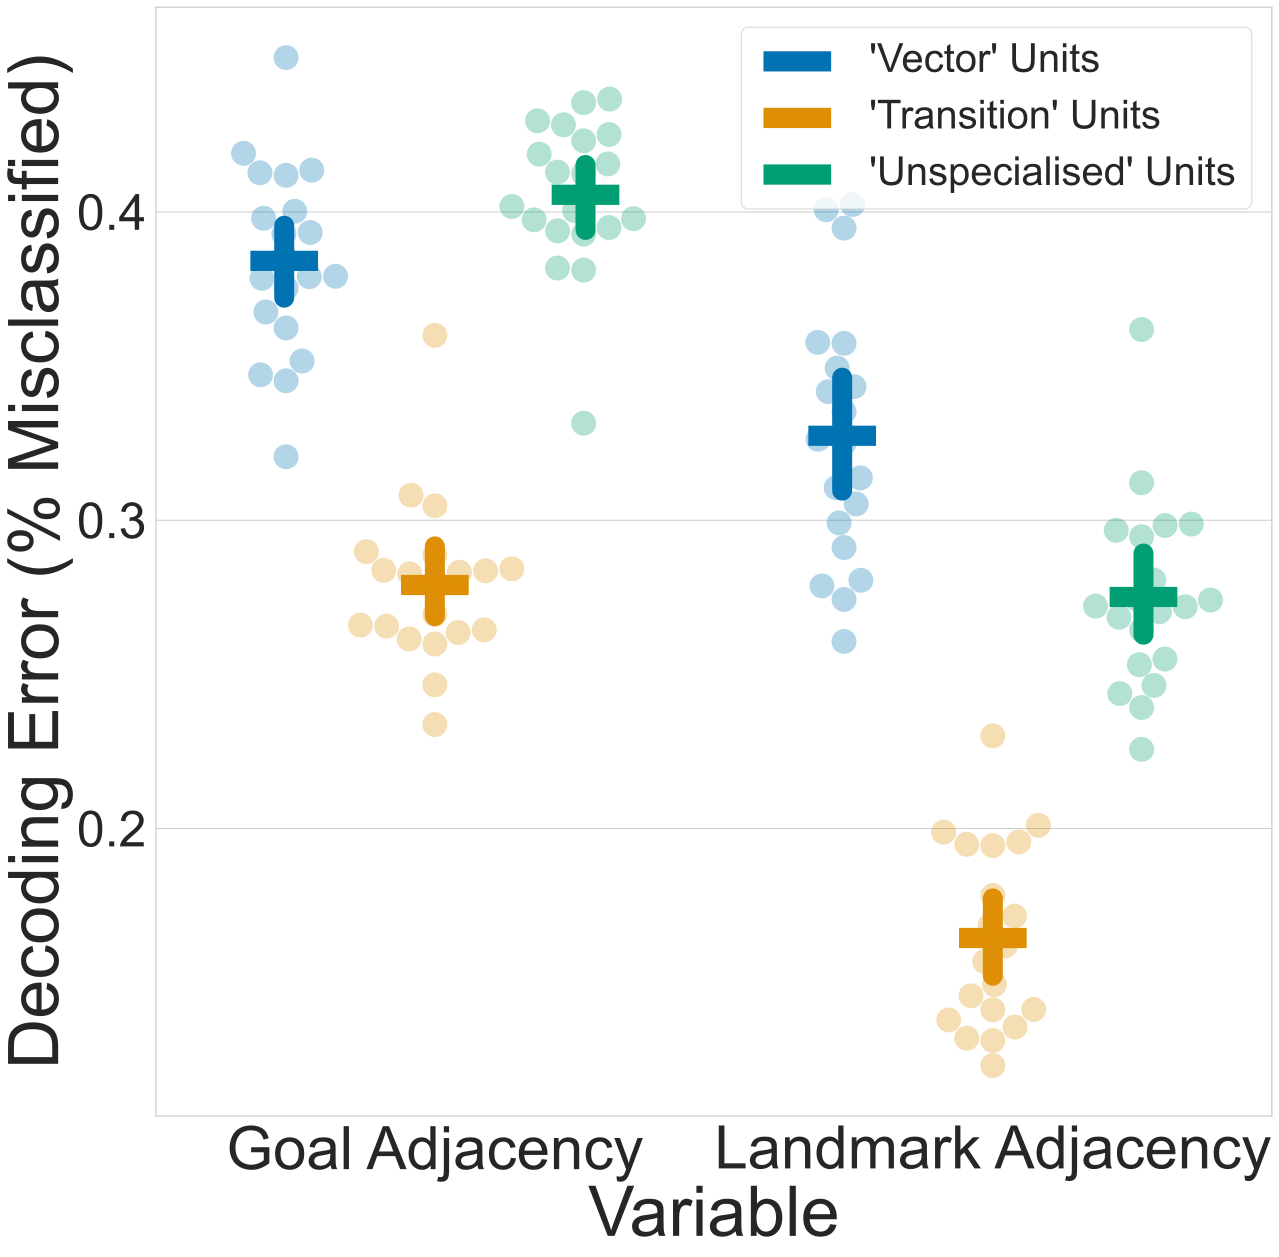

In [18]:
#plot error
temp = df_logdecoding[df_logdecoding['value'] != 'curr_at_landmark'].groupby(['model', 'cluster', 'value'])['error'].mean().reset_index()
print(temp)
sns.set(style="whitegrid", font_scale = 7)
fig = plt.figure(figsize = (20,20))
g = sns.pointplot(data = temp, x = 'value', y = 'error', hue = 'cluster',  palette = 'colorblind', ci = 95, dodge = 0.54, linestyles = 'none', markers = '_', scale = 10, errwidth = 20)
g2 = sns.swarmplot(data = temp, x = 'value', y = 'error', hue = 'cluster',  alpha = .3,  size = 25, palette = 'colorblind', dodge = 0.4)
g2.set_xlabel('Variable', fontsize = 70)
g2.set_xticklabels(['Goal Adjacency', 'Landmark Adjacency'], fontsize = 60)
g2.set_ylabel('Decoding Error (% Misclassified)', fontsize = 70)
#set yticklabel fontsize
yticks = g2.get_yticks()
yticks = np.around(yticks, decimals = 2)
g2.set_yticklabels(yticks, size = 50)
#set legend
g2.legend(loc = 'upper right', fontsize = 40, labels=['_', '_', '_',"'Vector' Units",'_', '_', '_',   "'Transition' Units", '_', '_', '_', "'Unspecialised' Units"])

In [19]:
#anova
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from itertools import combinations

#perform one-way ANOVA
# temp = df_logdecoding[df_logdecoding['value'] != 'curr_at_landmark'].groupby(['model', 'cluster', 'value'])['error'].mean().reset_index()
temp = df_logdecoding
temp = temp[temp['value'] == 'adj_to_goal'].groupby(['model', 'cluster'])['error'].mean().reset_index()

model = ols('error ~ C(cluster)', data = temp).fit()
anova_table = anova_lm(model, typ = 2)
print(anova_table)

#post-hoc t-tests with bonferroni correction
from statsmodels.stats.multitest import multipletests
from scipy.stats import ttest_ind

comparisons = list(combinations(temp['cluster'].unique(), 2))
p_values = []
t_stats = []
for g1, g2 in comparisons:
    temp1 = temp[temp['cluster'] == g1]['error']
    temp2 = temp[temp['cluster'] == g2]['error']
    p_values.append(ttest_ind(temp1, temp2)[1])
    t_stats.append(ttest_ind(temp1, temp2)[0])
    #degrees of freedom
    df = len(temp1) + len(temp2) - 2
    print(df)

reject, p_values_corrected, alphacSidak, alphacBonf = multipletests(p_values, alpha = 0.05, method = 'bonferroni')

for (g1, g2), p, p_corr, t in zip(comparisons, p_values, p_values_corrected, t_stats):
    print(f'{g1} vs {g2}: p-value = {p}, corrected p-value = {p_corr}')
    print(f't-statistic = {t}')
    print()


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
              sum_sq    df           F        PR(>F)
C(cluster)  0.183586   2.0  125.209963  1.386983e-21
Residual    0.041787  57.0         NaN           NaN
38
38
38
0 vs 1: p-value = 3.395128349702488e-14, corrected p-value = 1.0185385049107464e-13
t-statistic = 11.72873489224818

0 vs 2: p-value = 0.01839940284550798, corrected p-value = 0.055198208536523935
t-statistic = -2.4635143165516986

1 vs 2: p-value = 2.538262457501539e-18, corrected p-value = 7.614787372504618e-18
t-statistic = -15.834685763814086

